In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
from scipy import stats
plt.style.use("ggplot")

# LogNormal Distribution
* A LogNormal distribution is a continuous distribution of a RV whose logarithom is normally distributed
* Positively skewed / Right skewed
* Locaton = mean(ln(Y)) , where ln(Y) is log-normal of "Y"
* Scale = S.D(ln(Y)) , where ln(Y) is log-normal of "Y"

In [2]:
location, scale = 0, 1
lognormal_dis = np.random.lognormal(location, scale, size=1000)
lognormal_dis[:10]

array([3.77486496, 3.33731784, 2.20142487, 2.93080792, 0.46519066,
       0.47643459, 0.55594445, 0.82008654, 0.2082433 , 0.55516049])

In [3]:
lognormal_dis.min(), lognormal_dis.max()

(np.float64(0.04062953953027915), np.float64(28.34825486087311))

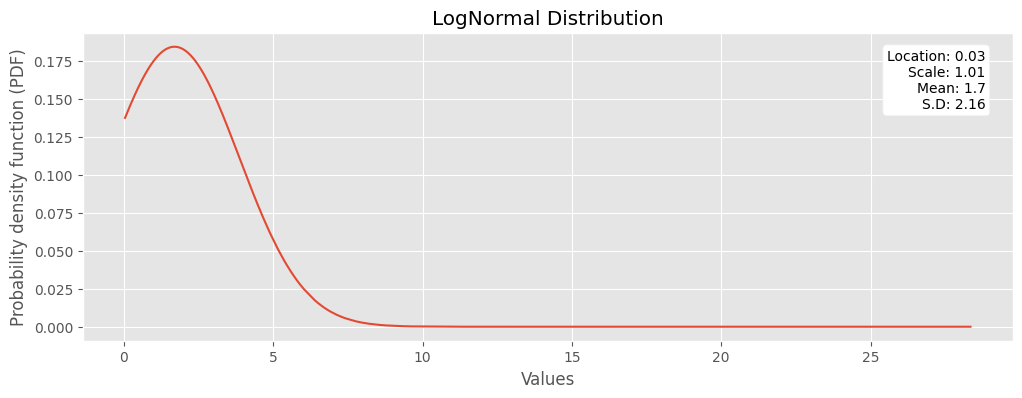

In [4]:
lognormal_dis = np.sort(lognormal_dis)
plt.figure(figsize=(12,4))
plt.plot(lognormal_dis, norm.pdf(lognormal_dis, lognormal_dis.mean(), lognormal_dis.std()))
plt.title("LogNormal Distribution")
plt.xlabel("Values")
plt.ylabel("Probability density function (PDF)")
plt.annotate(f'''Location: {np.round(np.log(lognormal_dis).mean(),2)}
Scale: {np.round(np.log(lognormal_dis).std(),2)}
Mean: {np.round(lognormal_dis.mean(),2)}
S.D: {np.round(lognormal_dis.std(),2)}''',
            xy=(650, 210), xycoords='axes points',
            size=10, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
plt.show()

## Recall
* The standard normal distribution (Z), has mean 0 and 1
  * If a LogNormal distribution has
    * location = 0
    * scale = 1
  * We call this "The Standerd LogNormal Distribution" as drawen in above fig.

## Prove that it's a LogNormal Distribution & Normality Test
* ln(lognormal_dis) = Normal_Distribution,   Checking for this condition

In [5]:
# using log on "lognormal_dis"
ln_dis = np.log(lognormal_dis)
ln_dis[:10]

array([-3.2032599 , -2.90009971, -2.82775605, -2.76554508, -2.61747696,
       -2.60228455, -2.6010071 , -2.58498239, -2.52776194, -2.42674064])

In [6]:
ln_dis.min(), ln_dis.max()

(np.float64(-3.203259902291145), np.float64(3.3445654713433624))

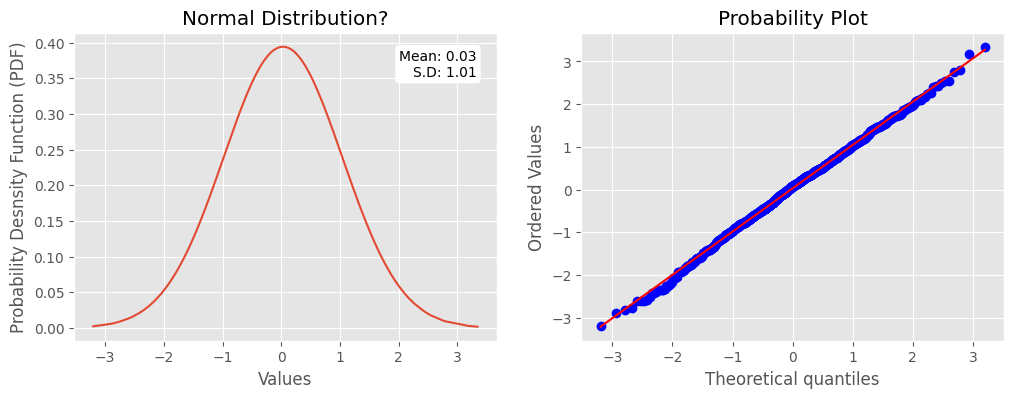

In [7]:
ln_dis = np.sort(ln_dis)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(ln_dis, norm.pdf(ln_dis, ln_dis.mean(), ln_dis.std()))
plt.title("Normal Distribution?")
plt.xlabel("Values")
plt.ylabel("Probability Desnsity Function (PDF)")
plt.annotate(f'Mean: {np.round(ln_dis.mean(),2)}\nS.D: {np.round(ln_dis.std(),2)}',
            xy=(290, 210), xycoords='axes points',
            size=10, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

plt.subplot(1,2,2)
stats.probplot(ln_dis, dist="norm", plot=plt)
plt.show()

# Example
* Wealth Distribution

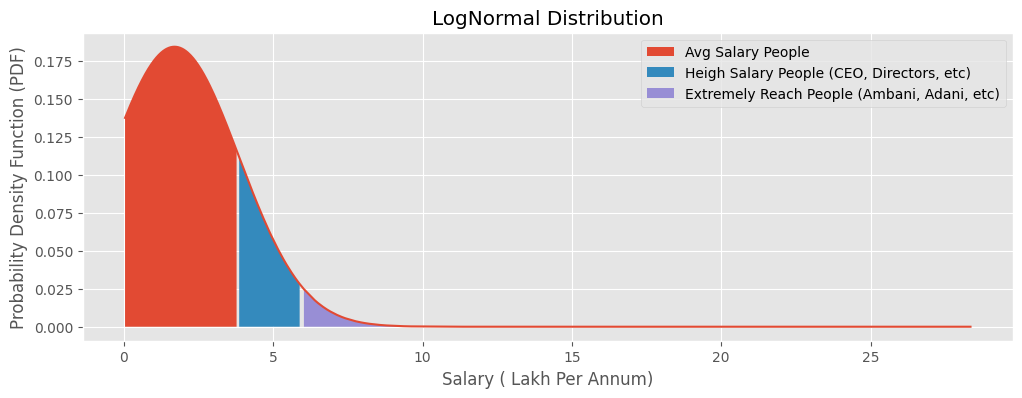

In [8]:
Avg_salary_people = (lognormal_dis<(lognormal_dis.mean()+lognormal_dis.std()))
Heigh_salary_people = (
    (lognormal_dis>=(lognormal_dis.mean()+lognormal_dis.std())) & 
    (lognormal_dis<(lognormal_dis.mean()+(lognormal_dis.std()*2)))
)
Extremely_reach_people = (lognormal_dis>=(lognormal_dis.mean()+(lognormal_dis.std()*2)))
plt.figure(figsize=(12,4))
plt.plot(lognormal_dis, norm.pdf(lognormal_dis, lognormal_dis.mean(),lognormal_dis.std()))
plt.fill_between(x=lognormal_dis, y1=norm.pdf(lognormal_dis, lognormal_dis.mean(),lognormal_dis.std()),
                where=Avg_salary_people, label="Avg Salary People")
plt.fill_between(x=lognormal_dis, y1=norm.pdf(lognormal_dis, lognormal_dis.mean(),lognormal_dis.std()),
                where=Heigh_salary_people, label="Heigh Salary People (CEO, Directors, etc)")
plt.fill_between(x=lognormal_dis, y1=norm.pdf(lognormal_dis, lognormal_dis.mean(),lognormal_dis.std()),
                where=Extremely_reach_people, label="Extremely Reach People (Ambani, Adani, etc)")
plt.title("LogNormal Distribution")
plt.xlabel("Salary ( Lakh Per Annum)")
plt.ylabel("Probability Density Function (PDF)")
plt.legend()
plt.show()